In [1]:
import os
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

from PIL import Image
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [28]:
count = 1
for filename in os.listdir('data/train/train_color/'):
    filename_without_ex = os.path.splitext(filename)[0]
    label_filename = filename_without_ex + '_instanceIds.png'
    shutil.copy('data/train/train_color/'+filename, 'data/train_color_batch/')
    shutil.copy('data/train/train_label_all/'+label_filename, 'data/train_label_batch/')
    count += 1
    if count == 10:
        break

In [2]:
filename = 'data/train/train_label/170908_065647862_Camera_6_instanceIds.png'
image = Image.open(filename)

In [3]:
print(np.unique(np.array(image)))

[  255 33000 33001 33002 33003 33004 33005 39000 39001 65535]


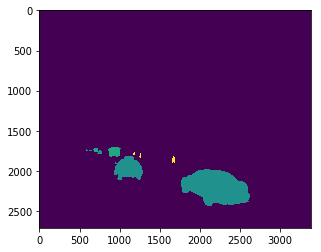

In [4]:
plt.imshow(np.array(image) // 1000)

In [5]:
print(np.asarray(image).shape)

(2710, 3384)


In [6]:
with tf.Session() as sess:
    placeholder_image = tf.placeholder(dtype=tf.uint8, shape=(None, None, None))
    qwe = tf.reshape(tensor=placeholder_image, shape=(2710, 3384, 1))
    
    resize_image = tf.image.resize_images(qwe, size=[129, 129], method=1)
    
    resize_image = tf.cast(resize_image, dtype=tf.uint8)
    resized_image = sess.run(resize_image, feed_dict={placeholder_image: [np.array(image) // 1000]})

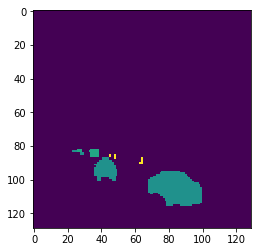

In [7]:
plt.imshow(np.squeeze(resized_image))

In [271]:
print(np.unique(resized_image))

[ 0 33 39 65]


In [48]:
def map_to_classes(image):
    """
    car, 33
    motorbicycle, 34
    bicycle, 35
    person, 36
    truck, 38
    bus, 39
    tricycle, 40
    """
    
    result = np.zeros(shape=image.shape, dtype=np.uint8)
    result[image == 33] = 1
    result[image == 34] = 2
    result[image == 35] = 3
    result[image == 36] = 4
    result[image == 38] = 5
    result[image == 39] = 6
    result[image == 40] = 7
    
    return result

In [283]:
mapped_image = map_to_classes(resized_image)

In [286]:
print(mapped_image.shape)

(129, 129, 1)


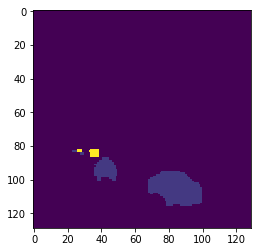

In [287]:
plt.imshow(np.squeeze(mapped_image))

In [49]:
def preprocess_image(image):
    with tf.Session() as sess:
        placeholder_image = tf.placeholder(dtype=tf.uint8, shape=(None, None, None))
        qwe = tf.reshape(tensor=placeholder_image, shape=(2710, 3384, 1))
        resize_image = tf.image.resize_images(qwe, size=[129, 129], method=1)
        resize_image = tf.cast(resize_image, dtype=tf.uint8)
        resized_image = sess.run(resize_image, feed_dict={placeholder_image: [np.array(image) // 1000]})
    
        mapped_image = map_to_classes(resized_image)
    
        labels = tf.one_hot(np.squeeze(mapped_image), depth=8, axis=-1)
        result_labels = sess.run(labels)
        
        return result_labels

In [288]:
with tf.Session() as sess:
    labels = tf.one_hot(np.squeeze(mapped_image), depth=8, axis=-1)
    
    result_labels = sess.run(labels)

In [50]:
def pickle_images(folder):
    img_names = os.listdir(folder)
    
    images = np.array([np.array(preprocess_image(Image.open(folder + img_name))) for img_name in img_names])
    images.dump('train_label_batch.npy')
    print(images.shape)

In [51]:
pickle_images('data/train_label_batch/')

(9, 129, 129, 8)


In [35]:
def unpickle_images(path):
    return np.load(path)

In [36]:
images = unpickle_images('train_label_batch.npy')

In [37]:
print(images.shape)

(9, 2710, 3384)


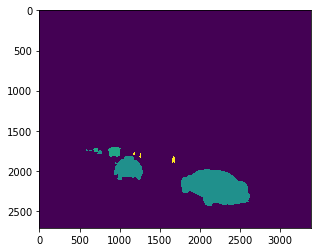

In [42]:
plt.imshow(images[7])